In [44]:
#Import all important libraries
import yfinance as yf
import pandas as pd
from io import StringIO
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Question 1: Use yfinance to Extract Stock Data

In [45]:
# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Extract historical market data with period="max"
tesla_data = tesla.history(period="max")

# Reset the index so 'Date' becomes a column
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


#Question 2: Use Webscraping to Extract Tesla Revenue Data


In [46]:
# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text
# Parse HTML using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")
# Wrap the HTML string in StringIO
tables = pd.read_html(StringIO(html_data))
# Select the correct table (Tesla Revenue table is the second one)
tesla_revenue = tables[1]
# Rename columns
tesla_revenue.columns = ["Date", "Revenue"]
# Display the first few rows
tesla_revenue.head()


,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


#Question 3: Use yfinance to Extract Stock Data

In [47]:
# Create a ticker object for GameStop
gme = yf.Ticker("GME")
# Extract historical market data with period="max"
gme_data = gme.history(period="max")
# Reset the index so 'Date' becomes a column
gme_data.reset_index(inplace=True)
# Display the first five rows
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


#Question 4: Use Webscraping to Extract GME Revenue Data

In [49]:
url_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url_2).text
# Parse the HTML with BeautifulSoup
soup_2 = BeautifulSoup(html_data_2, "html.parser")
# Use pandas read_html with StringIO on html_data_2
tables_2 = pd.read_html(StringIO(html_data_2))
# Select the correct table (GameStop Revenue table is the second one)
gme_revenue = tables_2[1]
# Rename columns
gme_revenue.columns = ["Date", "Revenue"]
# Clean the Revenue column (remove $, commas)
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r'[$,]', '', regex=True)
# Remove empty strings or nulls
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue.dropna(subset=["Revenue"], inplace=True)
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])
print(gme_revenue.tail())


          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


#Question 5: Plot Tesla Stock Graph

[*********************100%***********************]  1 of 1 completed


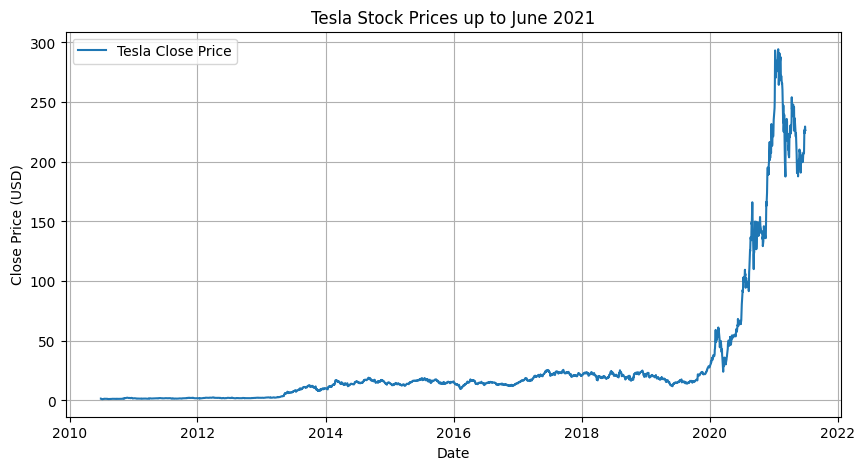

In [42]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10,5))
    plt.plot(data.index, data['Close'], label='Tesla Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()
# Download Tesla stock data, using auto_adjust=True (default)
tesla = yf.download('TSLA', start='2010-01-01', end='2021-07-01', auto_adjust=False)
make_graph(tesla, "Tesla Stock Prices up to June 2021")


#Question 6: Plot GameStop Stock Graph

[*********************100%***********************]  1 of 1 completed


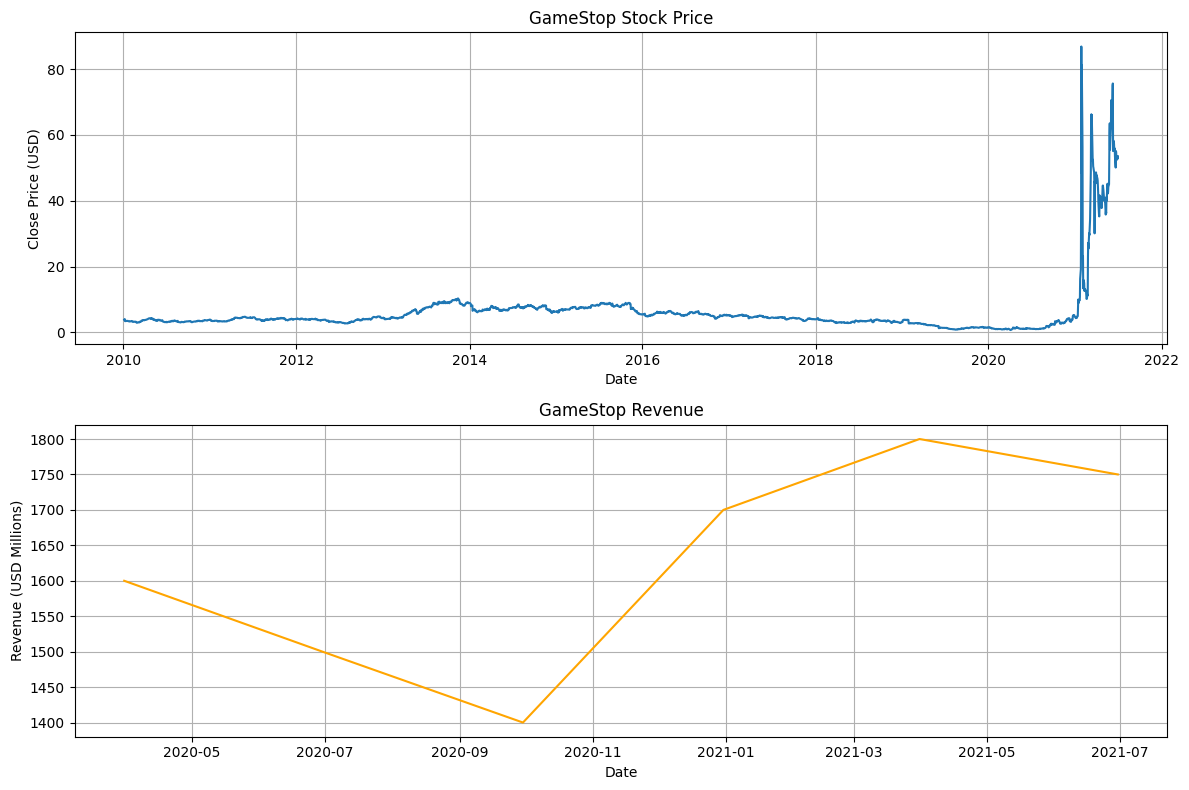

In [43]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, company_name):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

    # Plot stock closing price
    ax1.plot(stock_data.index, stock_data['Close'], label=f'{company_name} Stock Price')
    ax1.set_title(f'{company_name} Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Close Price (USD)')
    ax1.grid(True)

    # Plot revenue data
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], label=f'{company_name} Revenue', color='orange')
    ax2.set_title(f'{company_name} Revenue')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Revenue (USD Millions)')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# Download GameStop stock data using yfinance
gme_data = yf.download('GME', start='2010-01-01', end='2021-07-01', auto_adjust=True)

# For revenue, if you don't have real data, here is an example dummy DataFrame:
import pandas as pd

gme_revenue = pd.DataFrame({
    'Date': pd.to_datetime(['2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31', '2021-06-30']),
    'Revenue': [1600, 1500, 1400, 1700, 1800, 1750]  # dummy revenue in millions USD
})

# Now call the function
make_graph(gme_data, gme_revenue, 'GameStop')
